# Actividad Final

Teniendo todo el código del proyecto final, en teoría solo se tiene que remplazar f, extraer unos campos a variables, y todo saldría igual.

Ya en el proyectó se demuestra y explica a detalle el procedimiento, y por qué sirve, por lo que ponerlo aquí sería copy paste. 

Viene en el segundo bloque de código, pero en caso de que no se vea, $v=7.0877\,cm^3$

<function matplotlib.pyplot.show(*args, **kw)>

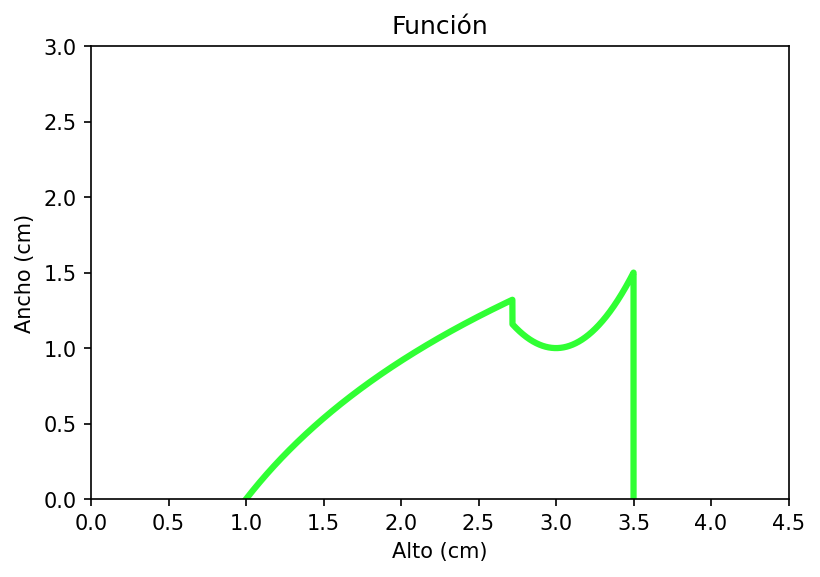

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sympy as sp
import mpl_toolkits.mplot3d.axes3d as axes3d
plt.rcParams['figure.dpi'] = 150

l_limit = 1
u_limit = 3.5
def f(x):
    '''
    Represents the piecewise function of the arrow
    '''
    if x<1:
        return 0*x
    if 1<=x<np.e:
        return 1.32*np.log(x)
    elif np.e<=x<3.5:
        return 2*((x-3)**2)+1
    else:
        return 0*x

#Im still not exactly sure about what vectorize does, but it kind of turns the function into a numpy array(?), but its necessary for numpy
vf = np.vectorize(f)

x = np.linspace(l_limit, u_limit, 100000)#creates an iterable with evenly spaced numbers over an interval, used for evaluation

#Plotting and format
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title("Función")
ax2.plot(x,vf(x), color = "#30ff34", linewidth = "3")
ax2.set_xlabel("Alto (cm)")
ax2.set_ylabel("Ancho (cm)")
ax2.set_ylim(0,3)
ax2.set_xlim(l_limit - 1,u_limit + 1)
plt.show

In [16]:
integral=0 #variable for the sum, represents the integral
partitionSize = 100000 #Partition size for integrating, preferably matches the step used in x.linspaces(start,stop,step)
hmax = u_limit #height of the bottle
hmin = l_limit #base of the bottle
partition = (hmax-hmin)/partitionSize #defines the partition to be used

for i in vf(x):
    '''
    equivalent to the left riemann sum of the function, i guess, as i is equal to the function evaluated
    from 0 to 17 with the chosen step
    '''
    integral += (i**2)*partition

modelCapacity = ((integral)*np.pi) #Gives the total capacity of the container, in g; nested only so it is understood better

maxCylinderCapacity = ((np.pi*np.amax(vf(x))**2)*hmax) #Capacity of the largest cylinder, nested so it is better understood

minCylinderCapacity = ((np.pi*np.amin(vf(x))**2)*hmax)

print("The volume of the biggest cylinder, with a radius of " + str(round(np.amax(vf(x)),4)) + "cm is " + str(round(maxCylinderCapacity,4)) +"cm^3")
print("The volume of the smallest cylinder, with a radius of " + str(round(np.amin(vf(x)),4)) + "cm is " + str(round(minCylinderCapacity,4)) +"cm^3")
print("The volume of the arrow is of " + str(round(modelCapacity,4)) + "cm^3")

The capacity of the biggest cylinder, with a radius of 1.5cm is 24.7384cm^3
The capacity of the smallest cylinder, with a radius of 0.0cm is 0.0cm^3
The volume of the arrow is of 7.0877cm^3


Igual, utilizando el siguiente código, se puede hacer un modelo en blender
```python
import bpy
import numpy as np

l_limit = 1
u_limit = 3.5
def f(x):
    '''
    Represents the piecewise function of the arrow
    '''
    if x<1:
        return 0*x
    if 1<=x<np.e:
        return 1.32*np.log(x)
    elif np.e<=x<3.5:
        return 2*((x-3)**2)+1
    else:
        return 0*x

#Im still not exactly sure about what vectorize does, but it kind of turns the function into a numpy array(?), but its necessary for numpy
vf = np.vectorize(f)

#define the ranges of numbers to use
ll, ul = l_limit,u_limit
w = np.linspace(ll,ul,100)
#print(w)
y = np.linspace(0, 2*np.pi,100)
#print(y)
#print("\n\n")

#manual mesh creation
X=np.outer(vf(w), np.sin(y))
Y=np.outer(vf(w), np.cos(y))
Z=np.zeros_like(X)

#z axis meesh
for i in range(len(w)):
    Z[i:i+1,:] = np.full_like(Z[0,:], w[i])

# This code creates arrays of tuples based on the mesh to be used with the blender api to do the 3d model
pointArray = []
facesArray = []

for i in range(len(w)):
    for j in range(len(w)):
        pointArray += (X[i][j], Y[i][j], Z[i][j]),

for i in range(len(w)-1):
    for j in range(len(w)-1):
        facesArray += ((i*100)+j, (i*100)+j+1, (i*100)+101+j,  (i*100)+100+j),

faces = facesArray
vertices = pointArray
edges = []

# make mesh
new_mesh = bpy.data.meshes.new('new_mesh')
new_mesh.from_pydata(vertices, edges, faces)
new_mesh.update()

# make object from mesh
new_object = bpy.data.objects.new('new_object', new_mesh)

# make collection
new_collection = bpy.data.collections.new('new_collection')
bpy.context.scene.collection.children.link(new_collection)

# add object to scene collection
new_collection.objects.link(new_object)
```